In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.multiclass import OneVsRestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import  OrdinalEncoder
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import export_graphviz 
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score
from sklearn import tree


def plot_data(indata, outdata, cf):
  f = plt.figure()
  ax = f.gca() 
  custom_cmap = ListedColormap(['blue', 'green','yellow','red','black','cyan','white'])
  labels = ["Normal","N-SS","Reverse","R-SS","Strike Slip","SS-N","SS-R"]
  
  sc=ax.scatter(indata[:,0], indata[:, 1],  s=10, c=outdata, cmap=custom_cmap,
                zorder=3,   clim=(outa.min(), outa.max()))
  plt.legend(labels)
  ax.axis('tight')
  xlim = ax.get_xlim()
  ylim = ax.get_ylim()
  ax.set_xlabel(r'$M_{11}$')
  ax.set_ylabel(r'$M_{22}$')
  n_classes = len(np.unique(outdata))

  xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))

  padding = np.zeros([xx.size,pcomp-2])
  plotdata = np.c_[xx.ravel(), yy.ravel(),padding]
  Z = cf.predict(plotdata).reshape(xx.shape)
  contours = ax.contourf(xx, yy, Z,
                         levels=np.arange(n_classes + 1) - 0.5, alpha=0.3,
                          cmap=custom_cmap,
                          zorder=1)
  ax.set(xlim=xlim, ylim=ylim)
  ax.set_xlabel(r'$M_{11}$')
  ax.set_ylabel(r'$M_{22}$')
   

In [8]:
pdata = pd.read_csv('../Data/global_mech.out',sep=' ',header=0)
num_attribs = ["mrr", "mtt","mff", "mrt", "mrf", "mtf"]
#num_attribs = ["mrr", "mtt"]
cat_attribs = ["Mechanism_type"]

In [9]:
pcomp = 6
mech_pipeline = Pipeline([("ord", OrdinalEncoder())])
# Uncomment if with Principal Component Analysis (PCA)
#num_pipeline = Pipeline([("scal",StandardScaler()),("pca",PCA(n_components=pcomp))])
num_pipeline = Pipeline([("scal",StandardScaler())])
pipeline = ColumnTransformer([("num",num_pipeline,num_attribs),("cat",mech_pipeline,cat_attribs)])
prepped = pipeline.fit_transform(pdata)
ina = prepped[:,0:pcomp]
outa = prepped[:,pcomp]

trainin, testin, trainout, testout = train_test_split(
     ina, outa, test_size=0.33, random_state=42)

print (ina)
print (outa)

[[ 2.52445362  0.10142841 -2.79559954  0.62310414  2.22437504 -1.549456  ]
 [-0.73950134 -0.18575067  0.95549022 -0.88299726  0.96235845 -1.38242495]
 [ 0.25417628 -0.06327724 -0.21718774  0.43131595  0.60107527 -0.29672318]
 ...
 [-1.87464001  1.19524284  0.96288882  0.44259761 -0.3555828  -1.14579764]
 [-0.17710741 -0.26852582  0.42501066 -0.31045309 -0.07645443 -0.26981262]
 [-0.38205341  1.36839494 -0.78687988 -0.56146999  0.80893682 -0.598307  ]]
[2. 0. 2. ... 0. 4. 5.]


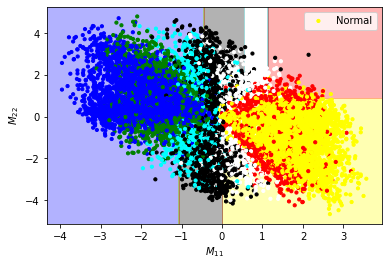

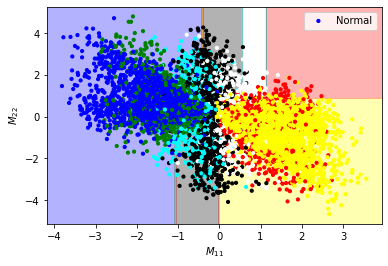

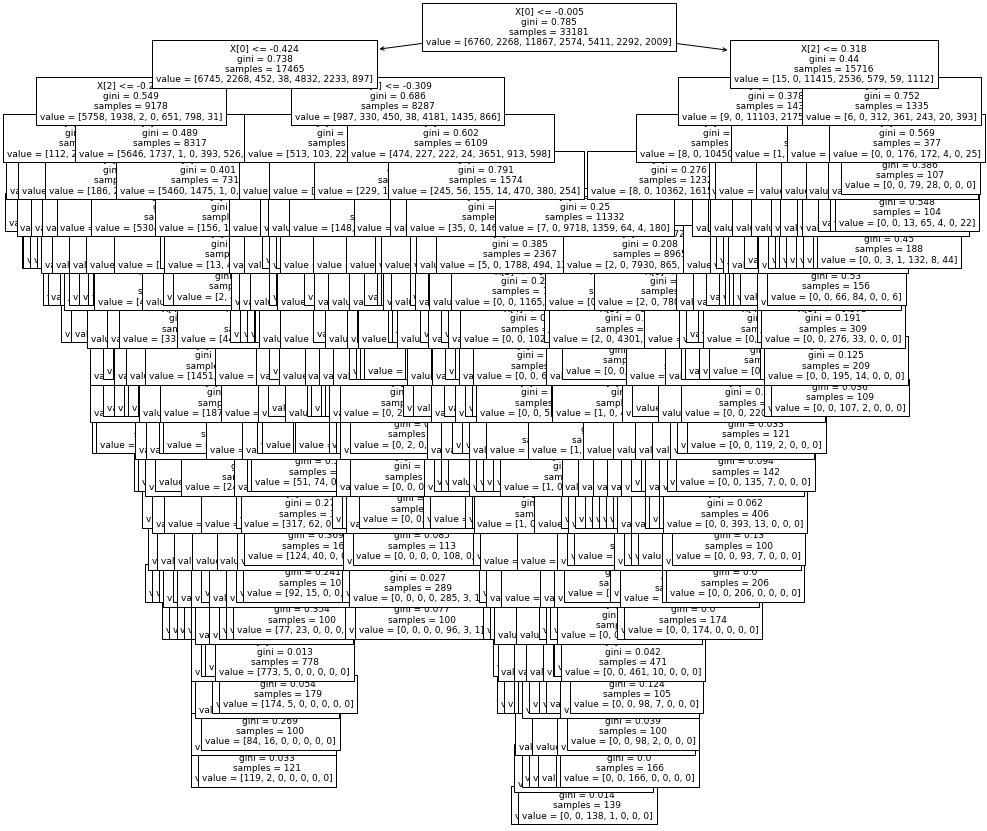

In [10]:
#rf = GradientBoostingClassifier()
#rf = RandomForestClassifier()
rf = DecisionTreeClassifier(min_samples_leaf=100)
#rf= ExtraTreeClassifier()
#rf = OneVsRestClassifier(svm.SVC(kernel='poly'))


rf.fit(trainin, trainout)

plot_data(ina,outa, rf)


p = rf.predict(testin)


plot_data(testin, testout, rf)

c=confusion_matrix(testout, p)


a = rf.predict(ina)
ac = accuracy_score(a,outa)
ac2 = accuracy_score(testout,p)
fig =plt.figure(figsize=(15,15))

tree.plot_tree(rf,ax=fig.gca(),fontsize=9) # only works for DecisionTree (DT)
plt.show()

# upper plot: training data
# lower plot: verification data

In [11]:
print(ac2) # accuracy
print(c) # confusion matrix: tells how many data categories are correctly assigned
# 7x7 matrix because we have 7 categores/ 6 input variables
# large numbers should be on diagonal

0.7334189916789036
[[2905  276   28    3   40   82   35]
 [ 584  451    1    0   54   91    1]
 [  12    0 5155  422   11   13  134]
 [   0    0  631  501   11    0  131]
 [  26   27   25   33 2066  275  240]
 [  95  118   11    3  341  474   76]
 [  12    1   92  140  210   72  435]]


confusion matrix for DT --> 2 columns completely zero
- nothing has been classified into that particular category

Why zero classification for which categories:
- red and yellow: difficult/ overlap
- blue and green: difficult/ overlap

With PCA: potentially better, but it's not always the case 

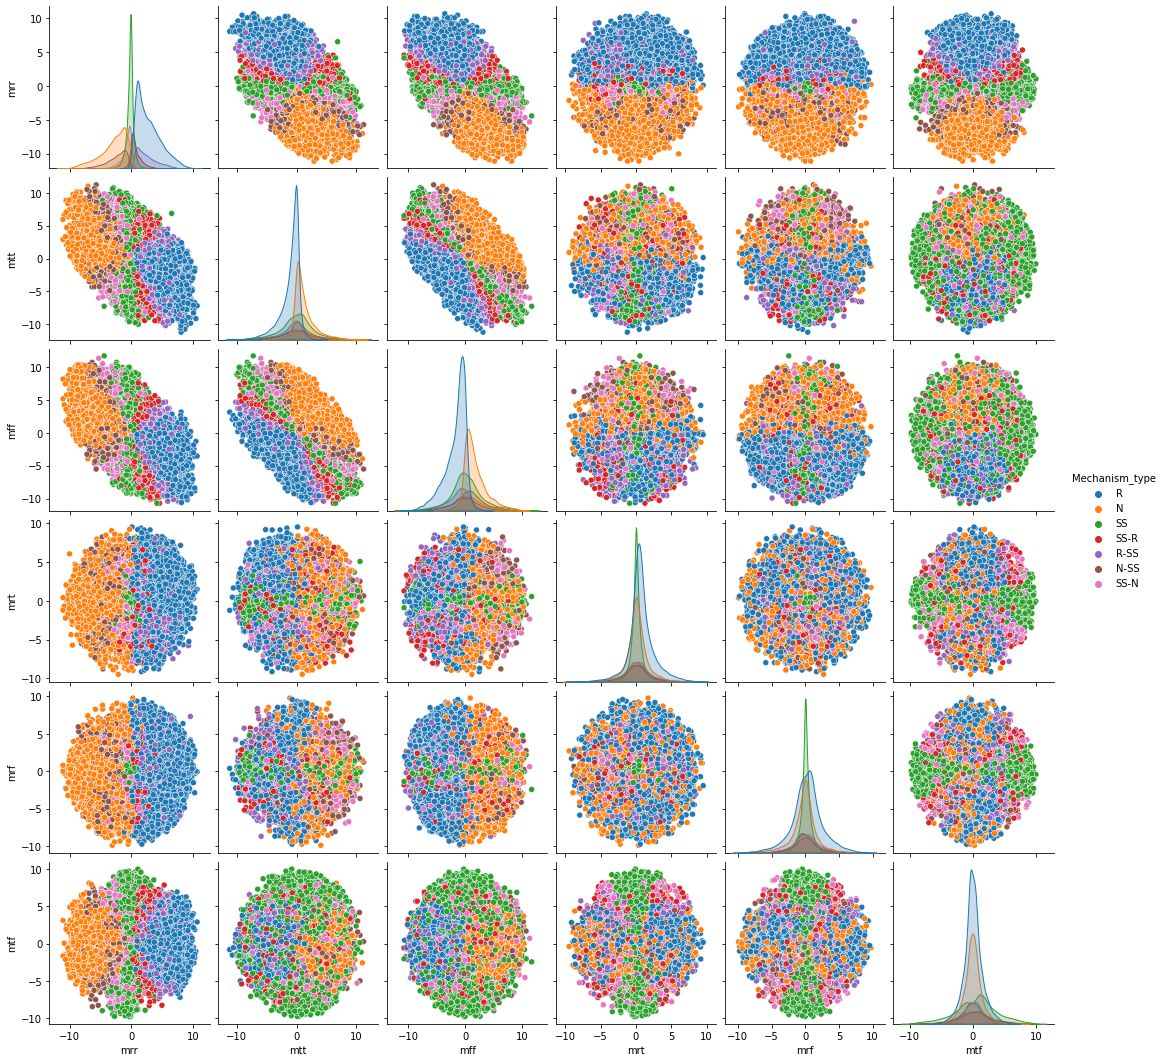

In [12]:
import seaborn as sns
sns.pairplot(pdata[np.concatenate([num_attribs,cat_attribs])],hue='Mechanism_type')